In [1]:
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import os
import zipfile
import xlrd
import plotly.express as px

In [11]:
sales_df    = pd.read_csv(r'datasets/sales_team_6.csv')
order_df    = pd.read_csv(r'datasets/order_leads_6.csv')
invoices_df = pd.read_csv(r'datasets/invoices_6.csv')


In [31]:
all_df = [sales_df, order_df, invoices_df]
for df in all_df:
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])

In [32]:
sales_df.head()

,sales_rep,sales_rep_id,company_name,company_id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [33]:
order_df.head()

,order_id,company_id,company_name,date,order_value,converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [34]:
invoices_df.head()

,meal_id,company_id,date_of_meal,participants,meal_price
0,QBGU1W8BRZZFHYUZ,D0AUXPP07H6AVSGD,2017-10-09 21:00:00,['Violet Medina'],598.0
1,QFNO07V7P3BTJSDK,D0AUXPP07H6AVSGD,2018-06-07 07:00:00,['Connie Harper'],89.0
2,ZDQ15BT9LLWUQ6M8,D0AUXPP07H6AVSGD,2014-12-18 20:00:00,['Arthur Lopez'],295.0
3,GL1ZVDU85Q9EO4TA,D0AUXPP07H6AVSGD,2018-03-05 12:00:00,['Violet Medina' 'Arthur Lopez'],193.0
4,42GWYA5XD8NVINY3,D0AUXPP07H6AVSGD,2017-06-17 08:00:00,['Arthur Lopez'],348.0


In [35]:
order_df.dtypes

order_id                object
company_id              object
company_name            object
date            datetime64[ns]
order_value              int64
converted                int64
dtype: object

In [57]:
order_plot = order_df.groupby(['date', 'converted'], as_index=False).size()

In [65]:
order_plot

,date,converted,size
0,2014-01-01,0,37
1,2014-01-01,1,11
2,2014-01-02,0,40
3,2014-01-02,1,12
4,2014-01-03,0,53
...,...,...,...
3647,2018-12-29,1,7
3648,2018-12-30,0,50
3649,2018-12-30,1,12
3650,2018-12-31,0,46


In [81]:
order_CR = order_plot.pivot(index='date', columns='converted', values='size').reset_index()

In [82]:
order_CR

converted,date,0,1
0,2014-01-01,37,11
1,2014-01-02,40,12
2,2014-01-03,53,7
3,2014-01-04,46,10
4,2014-01-05,43,7
...,...,...,...
1821,2018-12-27,49,6
1822,2018-12-28,37,6
1823,2018-12-29,46,7
1824,2018-12-30,50,12


In [83]:
order_CR['CR'] = order_CR[1]/(order_CR[0]+order_CR[1])

In [84]:
order_CR

converted,date,0,1,CR
0,2014-01-01,37,11,0.229167
1,2014-01-02,40,12,0.230769
2,2014-01-03,53,7,0.116667
3,2014-01-04,46,10,0.178571
4,2014-01-05,43,7,0.140000
...,...,...,...,...
1821,2018-12-27,49,6,0.109091
1822,2018-12-28,37,6,0.139535
1823,2018-12-29,46,7,0.132075
1824,2018-12-30,50,12,0.193548


In [103]:
df_plot = order_CR[['date', 'CR']]

In [121]:
df_plot

converted,date,CR
0,2014-01-01,0.229167
1,2014-01-02,0.230769
2,2014-01-03,0.116667
3,2014-01-04,0.178571
4,2014-01-05,0.140000
...,...,...
1821,2018-12-27,0.109091
1822,2018-12-28,0.139535
1823,2018-12-29,0.132075
1824,2018-12-30,0.193548


In [126]:
df_plot1 = df_plot.copy()
df_plot1['rolling_cr'] = df_plot1['CR'].rolling(window=30).mean()



<Axes: xlabel='date'>

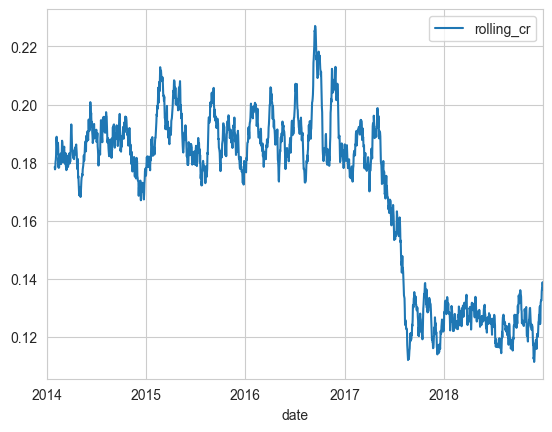

In [128]:
df_plot1.plot(x='date', y='rolling_cr')

In [105]:
# df_plot.set_index('date')['CR']

<Axes: xlabel='date'>

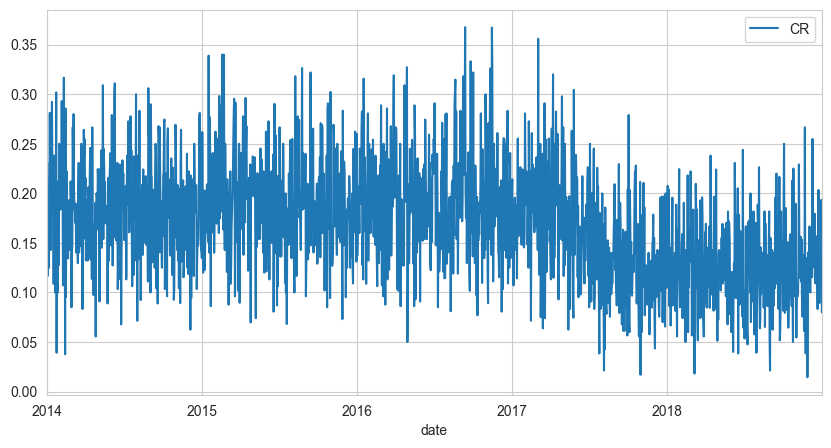

In [112]:
df_plot.plot(x='date', y='CR', figsize=(10,5))

In [49]:
# ax = plt.subplots(figsize=(20,10))
# sns.displot(data=order_plot, x='date', y='converted', ax=ax)

In [164]:
ke = order_df.groupby('date') \
    .agg({'converted':'mean'}) \
    .sort_values('date') \
    .rolling(50).mean()

In [158]:
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize':(20,8)}
)

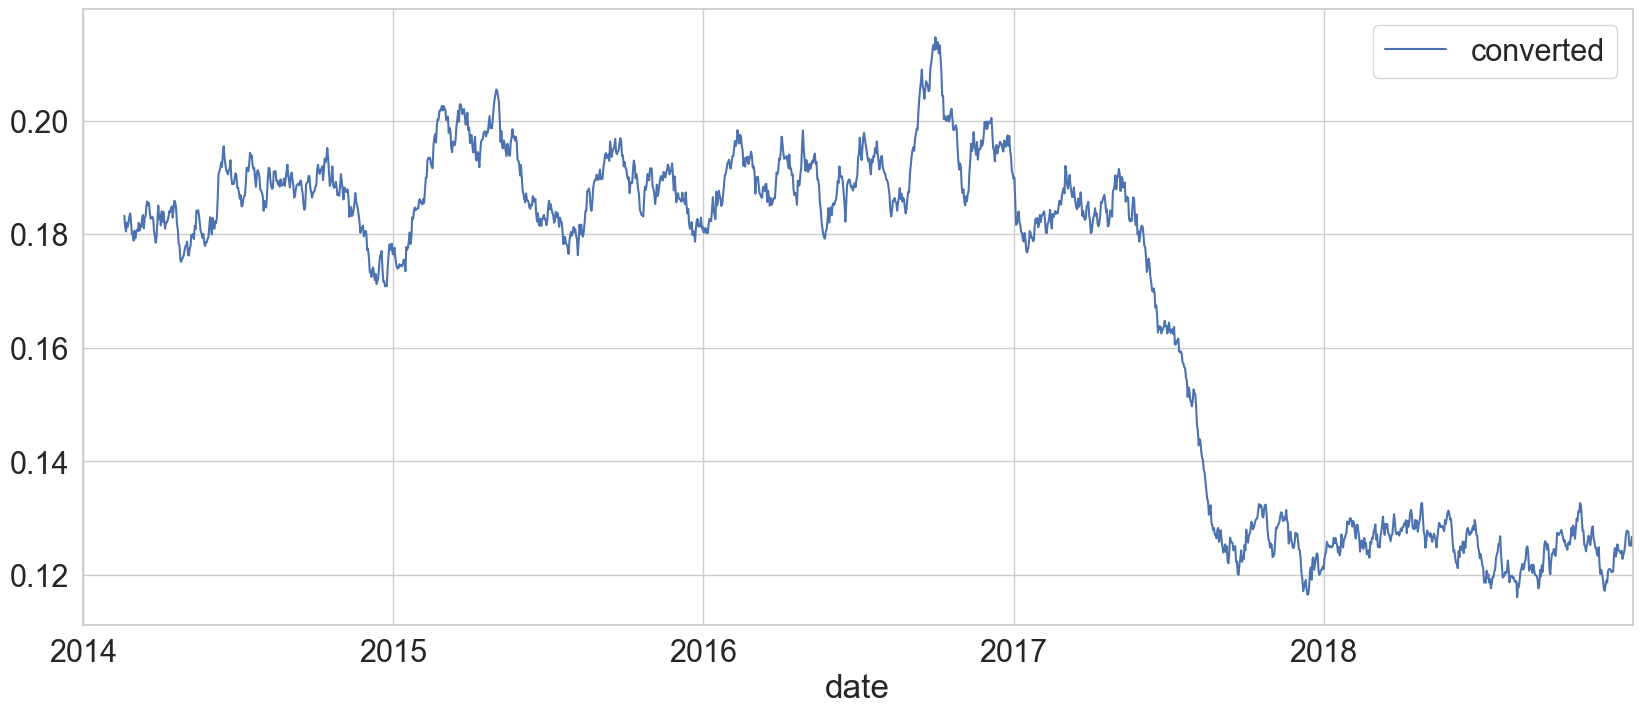

In [160]:
ax =order_df.groupby('date') \
    .agg({'converted':'mean'}) \
    .sort_values('date') \
    .rolling(50).mean().plot()

In [177]:
ke =ke.dropna().reset_index()

In [178]:
ke

,date,converted
0,2014-02-19,0.183254
1,2014-02-20,0.181358
2,2014-02-21,0.180492
3,2014-02-22,0.182018
4,2014-02-23,0.181304
...,...,...
1772,2018-12-27,0.125256
1773,2018-12-28,0.125189
1774,2018-12-29,0.125164
1775,2018-12-30,0.126740


In [183]:
fig = px.line(ke,x='date', y='converted')
fig.show()

In [184]:
total_df = order_df.merge(sales_df,how='left', on=['company_name', 'company_id'])

In [186]:
total_df.head()

,order_id,company_id,company_name,date,order_value,converted,sales_rep,sales_rep_id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [196]:
company_cr = total_df.groupby('sales_rep', as_index=False).agg({'converted':'mean'}).sort_values(by='converted',ascending=False).rename(columns={'converted':'CR'}).head(10)

In [197]:
company_cr

,sales_rep,CR
151,Ginger Wright,0.368421
438,Sierra Garcia,0.363636
466,Thomas Fortner,0.352941
249,Katie Rodriquez,0.333333
225,Jose Gaines,0.326087
455,Teddy Cook,0.315789
187,Jason Miller,0.307692
468,Thomas Lindsey,0.304348
192,Jennifer Peck,0.304348
346,Nick Allen,0.298507


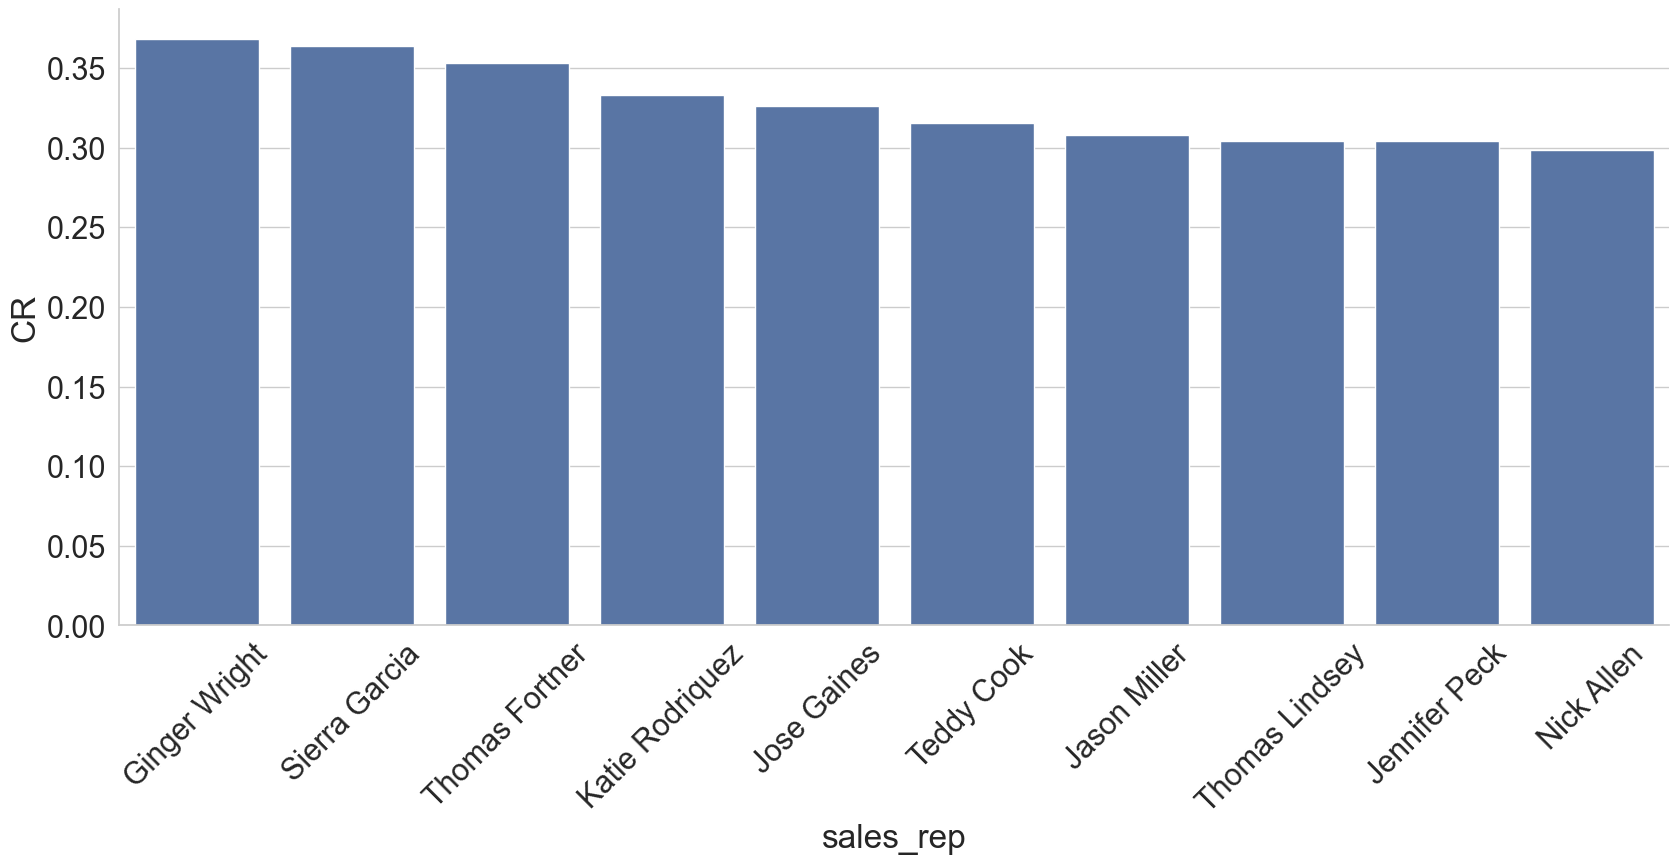

In [201]:
sns.barplot(data=company_cr, x='sales_rep', y='CR')
plt.xticks(rotation=45)
sns.despine()

In [204]:
import re

In [205]:
bank = """бета банк
бетабанк
Бетабанк
Бета-банк
БеттаБанк
бэтта банк
Сбербанк
бета онлайн банка
бета  банк"""

In [206]:
bank_pattern = re.compile('б[еэ]т{1,2}а.{0,2}банк')

In [208]:
bank_pattern.findall(bank)

['бета банк', 'бетабанк', 'бэтта банк', 'бета  банк']

In [209]:
bank_pattern = re.compile('б[еэ]т{1,2}а.{0,2}банк', re.IGNORECASE | re.MULTILINE)

In [210]:
bank_pattern.findall(bank)

['бета банк',
 'бетабанк',
 'Бетабанк',
 'Бета-банк',
 'БеттаБанк',
 'бэтта банк',
 'бета  банк']